# Setup

In [ ]:
include(joinpath("..","src","interactive_setup.jl"))

In [4]:
datadir = joinpath("..","data","count_lengths","run_2018-11-26")

"../data/count_lengths/run_2018-11-26"

In [5]:
params = load_params(joinpath(datadir,"params.jld2"))
params[!,:pindex] = 1:size(params,1)
settings = joinpath("..","src","settings.toml")

results = []
for_results_in(joinpath(datadir,"data"),reinterpret="reinterpret") do entry
  push!(results,DataFrame(length=entry["lengths"],
                          percepts=entry["percepts"].+1, # after +1, indicates the number of streams reported, 1 or 2
                          created=entry["created"],
                          pindex=entry["pindex"])) # the parameter index (pindex = N correspondes to row N of `params`)
end
df = vcat(results...);
first(df,6)

Progress: 100%|█████████████████████████████████████████| Time: 0:05:25


,length,percepts,created,pindex
,Float64,Int64,DateTime,Int64
1,0.2,2,2018-11-26T17:38:30.128,1
2,11.4,1,2018-11-26T17:38:30.128,1
3,0.4,2,2018-11-26T17:38:30.128,1
4,5.1,1,2018-11-26T17:38:30.128,1
5,0.4,2,2018-11-26T17:38:30.128,1
6,18.6,1,2018-11-26T17:38:30.128,1


# Figure 3A

In [6]:
fields = [:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ]
progress = Progress(nrow(unique(params[:,fields])))
herr = human_error()
df_summary = by(params,fields) do row
    next!(progress)
    err = model_error(df,params;bound=false,(k => row[1,k] for k in fields)...)
    DataFrame(stream_error = err.stream,length_error = err.lengths,eratio = error_ratio(err,herr))
end

┌ Warning: combine(gd) is deprecated, use DataFrame(gd) instead
│   caller = |> at operators.jl:854 [inlined]
└ @ Core ./operators.jl:854
┌ Warning: combine(gd) is deprecated, use DataFrame(gd) instead
│   caller = |>(::GroupedDataFrame{DataFrame}, ::typeof(combine)) at operators.jl:854
└ @ Base ./operators.jl:854
Progress: 100%|█████████████████████████████████████████| Time: 0:00:13


,f_c_a,f_c_m,f_c_σ,s_c_a,s_c_m,s_c_σ,t_c_a,t_c_m,t_c_σ
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,5.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,15.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,44.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,130.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,390.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1100.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,3400.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,10000.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
dfplot_ind = @linq df_summary |>
    rename_levels_for([:stream_error,:length_error,:eratio]) |>
    transform(a = packaxes(:c_a,pad=0.25), m = packaxes(:c_m,pad=0.25), rand = randn(length(:c_a))) |>
    transform(eratio_str = fmt.("01.1f",round.(:eratio,digits=1)))
              
head(dfplot_ind)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = #rename_levels_for#103(::Array{Symbol,1}, ::typeof(rename_levels_for), ::DataFrame, ::Array{Symbol,1}) at plotting.jl:29
└ @ Main /Users/davidlittle/Documents/work/projects/bistable/src/plotting.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = #rename_levels_for#103(::Array{Symbol,1}, ::typeof(rename_levels_for), ::DataFrame, ::Array{Symbol,1}) at plotting.jl:29
└ @ Main /Users/davidlittle/Documents/work/projects/bistable/src/plotting.jl:29
┌ Warning: Implicit broadcasting to a new column in DataFrame assignment is deprecated.Use `df[!, col_ind] .= v`  when `df` has some columns
│   caller = #rename_levels_for#103(::Array{Symbol,1}, ::typeof(rename_levels_for), ::DataFrame, ::Array{Symbol,1}) at plotting.jl:38
└ @ Main /Users/davidlittle/Documents/

,c_a,c_m,level,stream_error,length_error,eratio,a,m
,Float64,Float64,String,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,Peripheral,0.503779,0.28169,2.22576,0.0,0.0
2,0.0,5.0,Peripheral,0.267862,0.265998,1.36114,0.0,1.25
3,0.0,15.0,Peripheral,0.235876,0.582004,1.73032,0.0,2.25
4,0.0,44.0,Peripheral,0.242295,1.0,2.39228,0.0,3.25
5,0.0,130.0,Peripheral,0.242121,1.0,2.39166,0.0,4.25
6,0.0,390.0,Peripheral,0.242387,1.0,2.39261,0.0,5.25


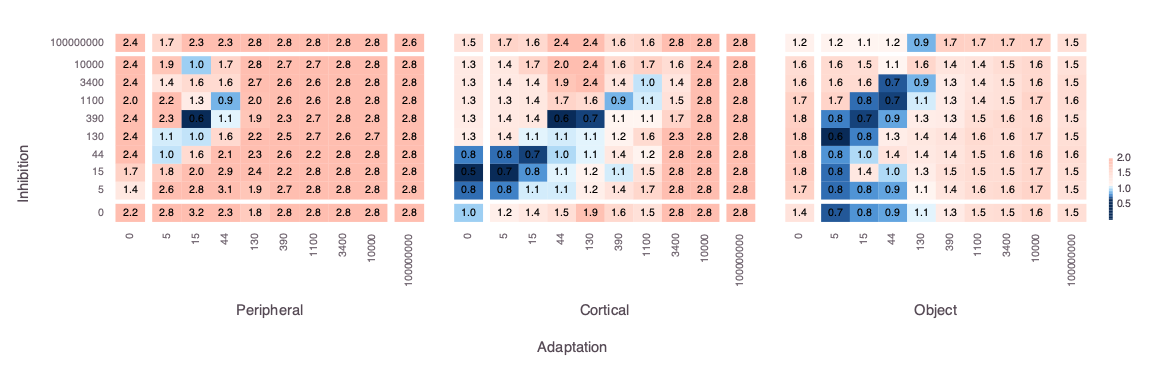

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = evalmapping(::DataFrame, ::Symbol) at dataframes.jl:96
└ @ Gadfly /Users/davidlittle/.julia/packages/Gadfly/09PWZ/src/dataframes.jl:96


false

In [14]:
xvals = sort!(unique(dfplot_ind.a));
yvals = sort!(unique(dfplot_ind.m));

pl = plot(dfplot_ind,x=:a,y=:m,color=:eratio,xgroup=:level,label=:eratio_str,
     Geom.subplot_grid(Geom.label(position=:centered),Geom.rectbin,Coord.cartesian(ymin=0,xmin=0),
                       Scale.x_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot_ind.c_a,pad=0.25)),
                       Scale.y_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot_ind.c_m,pad=0.25)),
                       Guide.xticks(ticks=xvals,orientation=:vertical),
                       Guide.yticks(ticks=yvals,orientation=:horizontal)),
     Guide.xlabel("Adaptation"), Guide.ylabel("Inhibition"),
     Scale.color_continuous(minvalue=0,maxvalue=2,colormap=colorscale("RdBu",reverse=true,minvalue=0.0,
            maxvalue=2,colorstop=4,colorstart=0.65,midvalue=1.15)),
     Guide.colorkey(title=""),
     Theme(grid_line_width=0inch,point_label_font_size=8pt,point_label_color=colorant"black"))
draw(PDF(joinpath(plotdir,"fig3A.pdf"),8.5inch,3.5inch),pl)
draw(PNG(12inch,4inch),pl)

# Figure 3B-C

In [16]:
head(dfplot_ind)

UndefVarError: UndefVarError: dfplot_ind not defined

In [8]:
hstr,hlen = human_error_by_sid();
dfstr_ind = vcat(DataFrame(kind=dfplot_ind.level,error=dfplot_ind.stream_error),DataFrame(kind="human",error=hstr.x1));
dflen_ind = vcat(DataFrame(kind=dfplot_ind.level,error=dfplot_ind.length_error),DataFrame(kind="human",error=hlen.x1));

In [9]:
dfstr_ind = @linq dfstr_ind |> where(.!ismissing.(:error));

In [10]:
mean(skipmissing(hstr.x1))

0.14032236445117163

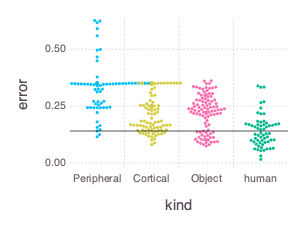

In [11]:
strplot = plot(dfstr_ind,y=:error,x=:kind,color=:kind,intercept=[mean(skipmissing(hstr.x1))],slope=[0],Geom.abline,Geom.beeswarm(padding=0.05mm),
    Coord.cartesian(ymax=0.6,ymin=0.0),Theme(key_position=:none,point_size=0.4mm,default_color="black",line_width=0.5pt),
    Guide.yticks(ticks=[0,0.25,0.5]),
    Guide.xticks(orientation=:horizontal))
draw(PNG(3.2inch,2.5inch),strplot)
draw(PDF(joinpath(plotdir,"fig3B.pdf"),3.2inch,2inch),strplot)

In [12]:
mean(hlen.x1)

0.32702577258831556

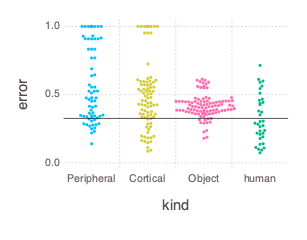

In [34]:
strplot = plot(dflen_ind,y=:error,x=:kind,color=:kind,intercept=[mean(hlen.x1)],slope=[0],Geom.abline,
    Geom.beeswarm(padding=0.05mm),Theme(key_position=:none,point_size=0.4mm,default_color="black",line_width=0.5pt),
    Guide.xticks(orientation=:horizontal),
    Coord.cartesian(ymax=1.0,ymin=0.0))
draw(PNG(3.2inch,2.5inch),strplot)
draw(PDF(joinpath(plotdir,"fig3C.pdf"),3.2inch,2inch),strplot)

# Figure 2

In [15]:
size(unique(human_data().stream[:,[:sid,:experiment]]),1)

72

In [16]:
threshold = quantile(df_summary.eratio,0.25)

1.3256681643686319

In [17]:
lendf = by(human_data()[2],:sid,mlen = :lengths => median)
lendf[lendf.mlen .< 2,:]

,sid,mlen
,Int64,Float64
1,10,1.4455
2,19,0.6712
3,29,1.8847


In [18]:
best_models = @where(df_summary,:eratio .<= threshold)[:,[:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ]]
best_params = map(AuditoryBistabilityLE.read_params,eachrow(best_models))
len = plot_lengths_data(df,params,best_params,norm=norm_bylogz,minlength=0.25)

┌ Info: The average simulation response less than minlength=0.25 is: %0.0.
└ @ Main /Users/davidlittle/Documents/work/projects/bistable/src/plotting.jl:237
┌ Warning: Eliminating %8.5 of data for human-10.
└ @ Main /Users/davidlittle/Documents/work/projects/bistable/src/measures.jl:235
┌ Info: The average human response less than minlength=0.25 is: %1.23.
└ @ Main /Users/davidlittle/Documents/work/projects/bistable/src/plotting.jl:252


(human = [0.9271870283171332, 0.904732292340548, 0.5566481212946933, 0.8826854699978303, 0.9860390868539733, 0.8827194425567148, 1.1081276080766498, 0.5045157441168135, 1.4084420634721033, 0.5955914462607185  …  3.404499497633807, 0.7519070521458181, 0.6104055902772708, 1.7822749133210047, 58.72281236829838, 3.95964152029362, 0.37972294737869927, 0.4480280483823501, 1.9709867002713575, 1.157629075390144], simulation = [6.680181029631685, 0.8284982789584312, 3.151007581906043, 1.2577401789768579, 0.900640506271674, 0.39079844498436644, 0.6449291635074833, 0.8284982789584312, 3.151007581906043, 1.7564281717255597  …  0.6117446221627245, 0.7782662781987906, 0.6241418893015587, 0.8265473282246101, 112.71835480576922, 0.6628615751272382, 4.197924118100092, 0.6241418893015587, 0.6117446221627245, 0.5876839337174482])

In [21]:
# save ranking of the parameters
CSV.write(joinpath(datadir,"model_rankings.csv"),df_summary[:,[:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ,:eratio]])

"../data/count_lengths/run_2018-11-26/model_rankings.csv"

## panel A

In [149]:
dfstream = plot_stream_data(df,params,best_params);
dfstream = dfstream |> @mutate(pos = log2(_.st) + (_.experiment == "human" ? -0.05 : 0.05)) |> DataFrame

,st,mean,lowerc,upperc,experiment,pos
,Int64,Float64,Float64,Float64,String,Float64
1,3,0.13937,0.0912277,0.195114,simulation,1.63496
2,6,0.613943,0.577673,0.647742,simulation,2.63496
3,12,0.839389,0.784967,0.896857,simulation,3.63496
4,3,0.134322,0.0953293,0.175364,human,1.53496
5,6,0.588438,0.531336,0.645087,human,2.53496
6,12,0.92684,0.895456,0.953981,human,3.53496


In [216]:
plot_theme = R"""
theme_bw() + theme(panel.border = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_line(linetype=2),
    panel.grid.minor = element_blank(),
    legend.position = "none")
""";

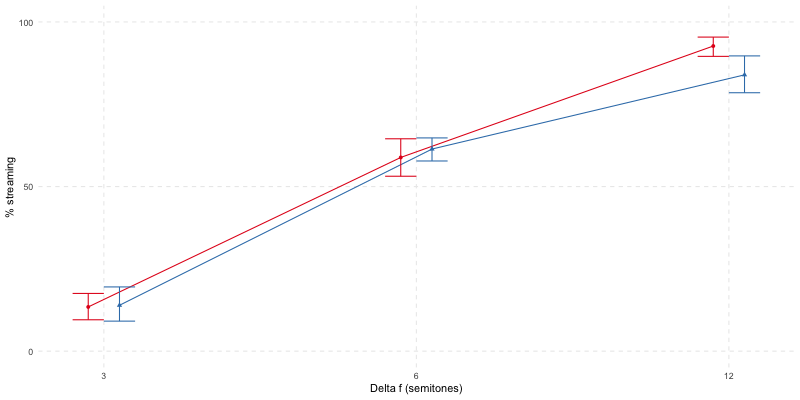

RObject{VecSxp}


In [265]:
p1 = R"""
ggplot($dfstream,aes(x=pos,y=mean,ymin=lowerc,ymax=upperc,color=experiment,shape=experiment)) + geom_point() + geom_line() +
  geom_errorbar(width=0.1) +
  scale_color_brewer(palette='Set1') + coord_cartesian(ylim=c(0,1)) +
  scale_y_continuous(name="% streaming",labels=c(0,50,100),breaks=c(0,0.5,1.0)) +
  scale_x_continuous(name="Delta f (semitones)",labels=c(3,6,12),breaks=log2(c(3,6,12))) +
  $plot_theme
"""

## panel B

In [176]:
using RCall

In [177]:
R"library(logKDE)"

RObject{StrSxp}
[1] "logKDE"    "ggplot2"   "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     


In [178]:
xmax = 5
dens1 = R"logdensity($(len.human),to=$xmax,bw='logG')";
dens2 = R"logdensity($(len.simulation),to=$xmax,bw='logG')";

x1 = collect(R"$(dens1)[['x']]");
y1 = collect(R"$(dens1)[['y']]");
x2 = collect(R"$(dens2)[['x']]");
y2 = collect(R"$(dens2)[['y']]");
dens = DataFrame(x=[x1;x2],y=[y1;y2],experiment=[fill("human",length(x1));fill("simulation",length(x2))]);

┌ Warning: RCall.jl: Warning in logdensity(`#JL`$`(len.human)`, to = `#JL`$xmax, bw = "logG") :
│   Auto-range choice cut-off at 0.
└ @ RCall /Users/davidlittle/.julia/packages/RCall/iojZI/src/io.jl:113
┌ Warning: RCall.jl: Warning in logdensity(`#JL`$`(len.simulation)`, to = `#JL`$xmax, bw = "logG") :
│   Auto-range choice cut-off at 0.
└ @ RCall /Users/davidlittle/.julia/packages/RCall/iojZI/src/io.jl:113


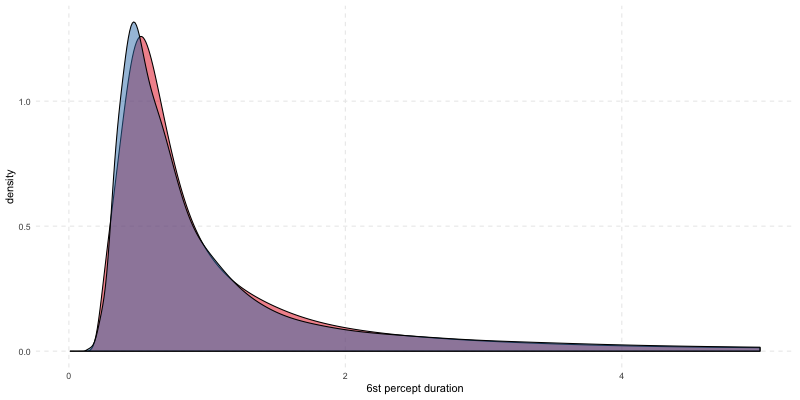

RObject{VecSxp}


In [269]:
p2 = R"""
ggplot($dens,aes(x=x,y=y,fill=experiment)) + geom_density(stat='identity',alpha=0.5) +
  scale_fill_brewer(palette='Set1') +
  scale_x_continuous(name='6st percept duration',breaks=c(0,2,4)) + 
  scale_y_continuous(name='density') +
  $plot_theme
"""

## panel C

In [192]:
settings = TOML.parsefile(settings)

Dict{AbstractString,Any} with 9 entries:
  "percept_lengths" => Dict{AbstractString,Any}("threshold"=>0.2,"min_length"=>…
  "freqs"           => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "mask"            => Dict{AbstractString,Any}("window"=>0.5,"mask_wait"=>2,"d…
  "rates"           => Dict{AbstractString,Any}("freqbound"=>Dict{AbstractStrin…
  "scales"          => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "stimulus"        => Dict{AbstractString,Any}("repeats"=>100,"pattern"=>"aba_…
  "track"           => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "nmf"             => Dict{AbstractString,Any}("skipframes"=>0,"tol"=>0.001,"n…
  "bandwidth_ratio" => Dict{AbstractString,Any}("window"=>0.8,"full_band_ratio"…

In [193]:
p_none = copy(params[select_params(params,t_c_a=5,t_c_m=5,Δf=6),:])
p_none.t_c_σ .= 0
p_none.t_c_a .= 0
p_none.t_c_m .= 0

p_o = copy(params[select_params(params,t_c_a=5,t_c_m=5,Δf=6),:])
p_o.t_c_σ .= 0.5
p_s = copy(params[select_params(params,s_c_a=5,s_c_m=5,Δf=6),:])
p_s.s_c_σ .= 0.5
p_f = copy(params[select_params(params,f_c_a=15,f_c_m=130,Δf=6),:])
p_f.f_c_σ .= 0.5

p_all = copy(p_f)
p_all.f_c_σ .= 1.0
p_all.t_c_a .= 5
p_all.t_c_m .= 5
p_all.t_c_σ .= 1.0
p_all.s_c_a .= 5
p_all.s_c_m .= 5
p_all.s_c_σ .= 1.0

models = [:none => p_none,:object => p_o,:central => p_s,:peripheral => p_f,:combined => p_all]
settings["stimulus"]["repeats"] = 36

36

In [194]:
results = []
N = 5
@showprogress for (run,Δ,(name,model)) in Iterators.product(1:N,[3,6,12],models)
    model.Δf .= Δ
    with_logger(NullLogger()) do
        len,val = bistable_model(model,settings).percepts.counts
        push!(results,DataFrame(length=len,response=val.+1,run=run,delta=Δ,model=name))
    end
end

responses = vcat(results...);

Progress: 100%|█████████████████████████████████████████| Time: 0:02:39


In [195]:
first(responses,6)

,length,response,run,delta,model
,Float64,Int64,Int64,Int64,Symbol
1,16.5,1,1,3,none
2,16.5,1,2,3,none
3,16.5,1,3,3,none
4,16.5,1,4,3,none
5,16.5,1,5,3,none
6,0.6,1,1,6,none


In [256]:
img = by(responses,[:delta,:model]) do df
    buildup_image(df,delta=0.1,length=17.28)
end
img = img[(img.time .> 4.5) .& (img.time .< 15.5),:];
img[!,:model] .= string.(img.model);

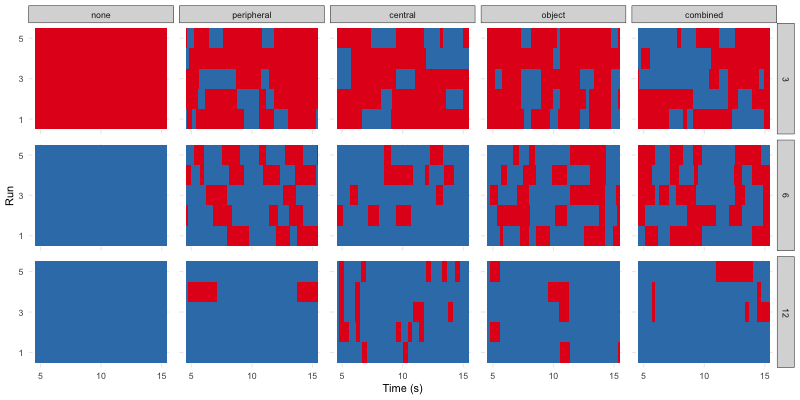

RObject{VecSxp}


In [257]:
p3 = R"""
df = $img
df$model = factor(df$model, levels=c("none","peripheral","central","object","combined"), ordered=T)
df = df %>% arrange(model)
ggplot(df,aes(x=time,y=run,fill=factor(value))) + geom_tile() + facet_grid(delta~model) +
    scale_fill_brewer(palette='Set1') +
    scale_x_continuous(name='Time (s)',breaks=c(5,10,15)) + 
    scale_y_continuous(name='Run',breaks=c(1,3,5)) +
    $plot_theme
"""

## full plot

In [ ]:
# TODO: change from Gadfly to ggplot, since I think it will make things easier to read. I need to use cowplot to combine separate plots as panels

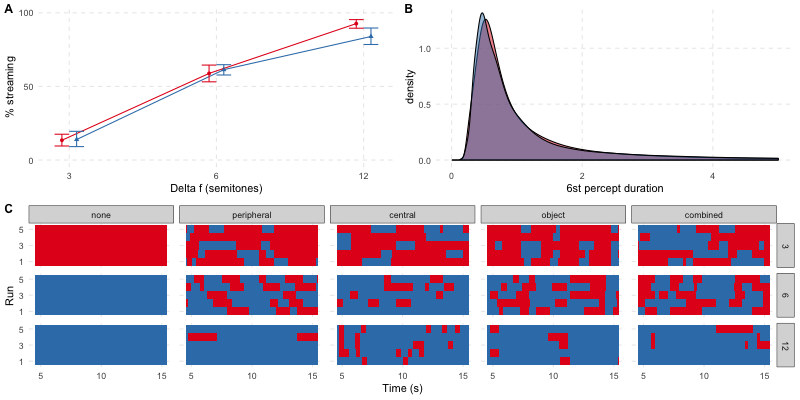

RObject{VecSxp}


In [266]:
R"""
top_row = plot_grid($p1,$p2,labels=c('A','B'), label_size=12)
plot_grid(top_row,$p3,labels=c('','C'), label_size=12, ncol=1)
"""

In [267]:
R"""
ggsave($(joinpath(plotdir,"fig2_raw.pdf")),width=5,height=5)
"""

RObject{NilSxp}
NULL


In [32]:
len = plot_lengths_data(df,params,best_params,norm=norm_bymean,minlength=0.25)

┌ Info: The average simulation response less than minlength=0.25 is: %0.0.
└ @ Main /Users/davidlittle/Documents/work/projects/bistable/src/plotting.jl:237
┌ Warning: Eliminating %8.5 of data for human-10.
└ @ Main /Users/davidlittle/Documents/work/projects/bistable/src/measures.jl:235
┌ Info: The average human response less than minlength=0.25 is: %1.23.
└ @ Main /Users/davidlittle/Documents/work/projects/bistable/src/plotting.jl:252


(human = [0.945415, 0.927714, 0.577025, 0.909902, 0.989849, 0.90993, 1.07413, 0.506026, 1.24728, 0.625849  …  1.78998, 0.816131, 0.681691, 1.37264, 3.62628, 1.88739, 0.375602, 0.482266, 1.43754, 1.09439], simulation = [2.24616, 0.876548, 1.7531, 1.15047, 0.931333, 0.38349, 0.712196, 0.876548, 1.7531, 1.36961  …  0.196753, 0.590259, 0.229545, 0.688636, 8.72272, 0.327922, 3.3448, 0.229545, 0.196753, 0.131169])

## Supplementary figures for panel B

In [22]:
len = plot_lengths_data(df,params,best_params,norm=norm_bymean,minlength=0.25)

┌ Info: The average simulation response less than minlength=0.25 is: %0.0.
└ @ Main /Users/davidlittle/Documents/work/projects/bistable/src/plotting.jl:237
┌ Warning: Eliminating %8.5 of data for human-10.
└ @ Main /Users/davidlittle/Documents/work/projects/bistable/src/measures.jl:235
┌ Info: The average human response less than minlength=0.25 is: %1.23.
└ @ Main /Users/davidlittle/Documents/work/projects/bistable/src/plotting.jl:252


(human = [0.9454153477688179, 0.9277141668703187, 0.5770251512674005, 0.9099018325595841, 0.9898489243099483, 0.9099296209126431, 1.0741309991374959, 0.506025909201992, 1.2472802270473045, 0.6258492875918322  …  1.7899803330131794, 0.81613142080681, 0.6816913361246683, 1.37264139138008, 3.626283285877977, 1.8873855411723475, 0.3756021450499992, 0.4822660723399109, 1.4375394978889893, 1.094386406093445], simulation = [2.246155489107219, 0.8765484835540366, 1.7530969671080732, 1.1504698846646728, 0.9313327637761639, 0.38348996155489096, 0.7121956428876547, 0.8765484835540366, 1.7530969671080732, 1.3696070055531822  …  0.19675303730781632, 0.5902591119234489, 0.22954521019245233, 0.6886356305773572, 8.722717987313189, 0.32792172884636056, 3.3448016342328772, 0.22954521019245233, 0.19675303730781632, 0.1311686915385442])

In [23]:
xmax = 4
dens1 = R"density($(len.human),to=$xmax,bw=0.2)";
dens2 = R"density($(len.simulation),to=$xmax,bw=0.2)";

x1 = collect(R"$(dens1)[['x']]");
y1 = collect(R"$(dens1)[['y']]");
x2 = collect(R"$(dens2)[['x']]");
y2 = collect(R"$(dens2)[['y']]");
dens = DataFrame(x=[x1;x2],y=[y1;y2],experiment=[fill("human",length(x1));fill("simulation",length(x2))]);

In [24]:
p2_S = plot(dens,x=:x,y=:y,ymax=:y,ymin=fill(0,size(dens,1)),color=:experiment,Geom.line,Geom.ribbon,
         Guide.colorkey(pos=[0.5*Gadfly.w,-0.3*Gadfly.h]),
         Theme(lowlight_color=c->RGBA{Float32}(c.r, c.g, c.b, 0.3)),
         Coord.cartesian(xmin=0,xmax=xmax,ymax=1));

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = evalmapping(::DataFrame, ::Symbol) at dataframes.jl:96
└ @ Gadfly /Users/davidlittle/.julia/packages/Gadfly/1wgcD/src/dataframes.jl:96


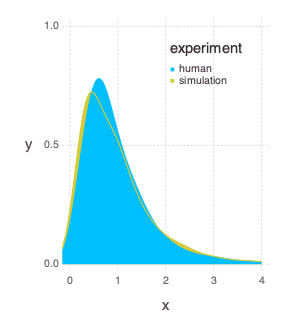

In [29]:
draw(PNG(3inch,3.5inch),p2_S)
draw(PDF(joinpath(plotdir,"fig1S.pdf"),3inch,2.5inch),p2_S)
draw(PNG(joinpath(plotdir,"fig1S.png"),3inch,2.5inch),p2_S)

In [50]:
xmax = 4
dens1 = R"density($(len.human),to=$xmax,bw='nrd0')";
dens2 = R"density($(len.simulation),to=$xmax,bw='nrd0')";

x1 = collect(R"$(dens1)[['x']]");
y1 = collect(R"$(dens1)[['y']]");
x2 = collect(R"$(dens2)[['x']]");
y2 = collect(R"$(dens2)[['y']]");
dens = DataFrame(x=[x1;x2],y=[y1;y2],experiment=[fill("human",length(x1));fill("simulation",length(x2))]);

In [51]:
p2_Sb = plot(dens,x=:x,y=:y,ymax=:y,ymin=fill(0,size(dens,1)),color=:experiment,Geom.line,Geom.ribbon,
         Guide.colorkey(pos=[0.5*Gadfly.w,-0.3*Gadfly.h]),
         Theme(lowlight_color=c->RGBA{Float32}(c.r, c.g, c.b, 0.3)),
         Coord.cartesian(xmin=0,xmax=xmax,ymax=1));

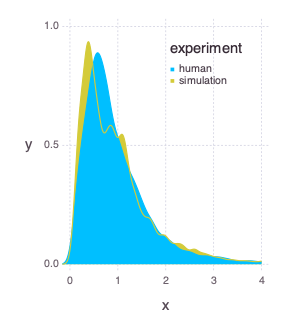

In [52]:
draw(PNG(3inch,3.5inch),p2_Sb)
draw(PDF(joinpath(plotdir,"fig2S.pdf"),5inch,2.5inch),hstack(p1,p2))

In [109]:
hstream = human_data().stream;

In [115]:
@show length(unique(hstream.sid))

length(unique(hstream.sid)) = 43


43

In [5]:
hlen = human_data().lengths;

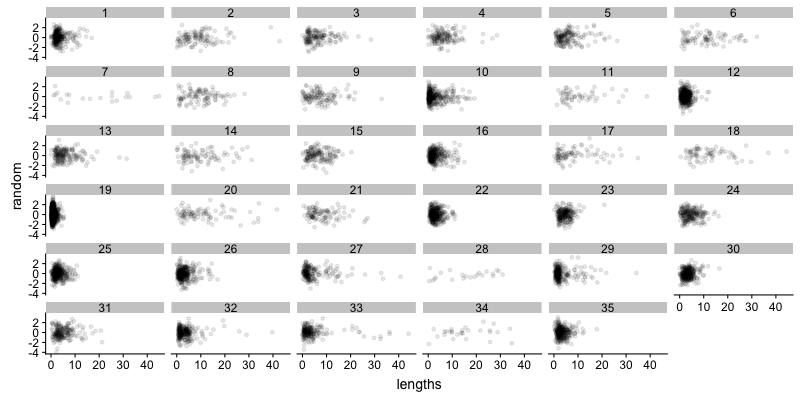

RObject{VecSxp}


In [6]:
R"""
ggplot($hlen,aes(x=lengths,y=rnorm(length(lengths)))) + facet_wrap(~sid) + geom_point(alpha=0.1) + ylab('random') """

In [107]:
counts = by(hlen,:sid,count = :lengths => length)
@show mean(counts.count)
@show minimum(counts.count)
@show maximum(counts.count)


mean(counts.count) = 210.9142857142857
minimum(counts.count) = 20
maximum(counts.count) = 1232


1232

# Figure 2s (supplementary figure)

In [16]:
mean_cv = by(hlen,:sid,
    logmean = :lengths => x -> mean(log.(filter(!iszero,x))),
    logsd = :lengths => x -> std(log.(filter(!iszero,x))),
    mean = :lengths => mean,
    sd = :lengths => std
);
mean_cv[!,:logcv] = mean_cv.logmean ./ mean_cv.logsd;
mean_cv[!,:cv] = mean_cv.mean ./ mean_cv.sd;

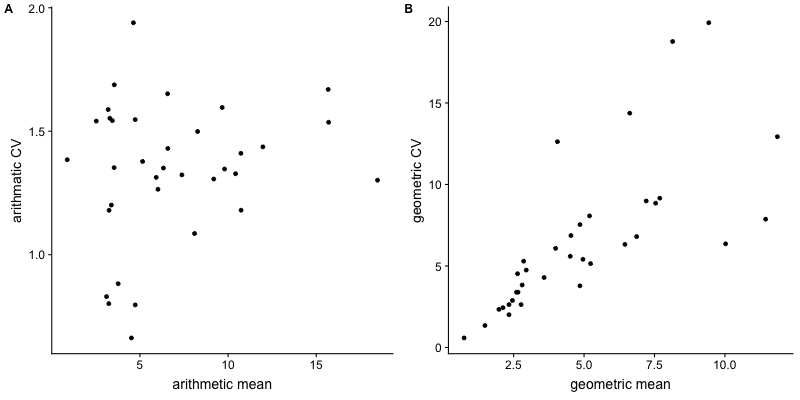

RObject{VecSxp}


In [23]:
R"""
p1 = ggplot($mean_cv,aes(x=mean,y=cv)) + geom_point() + xlab('arithmetic mean') + ylab('arithmatic CV')
p2 = ggplot($mean_cv,aes(x=exp(logmean),y=exp(logcv))) + geom_point() + xlab('geometric mean') + ylab('geometric CV')

plot_grid(p1,p2,labels=c('A','B'), label_size=12, ncol=2)
"""

In [26]:
R"""
ggsave($(joinpath(plotdir,"fig2S.pdf")),width=10,height=5)
ggsave($(joinpath(plotdir,"fig2S.png")),width=10,height=5)
"""

RObject{NilSxp}
NULL


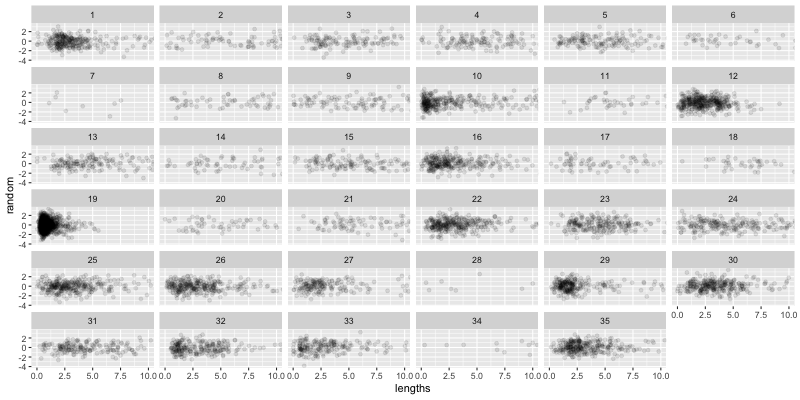

RObject{VecSxp}


In [34]:
R"""
ggplot($hlen,aes(x=lengths,y=rnorm(length(lengths)))) + facet_wrap(~sid) + geom_point(alpha=0.1) + ylab('random') + coord_cartesian(xlim=c(0,10))
"""

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = sexp(::Type{RCall.RClass{:list}}, ::DataFrame) at dataframe.jl:25
└ @ RCall /Users/davidlittle/.julia/packages/RCall/iojZI/src/convert/dataframe.jl:25


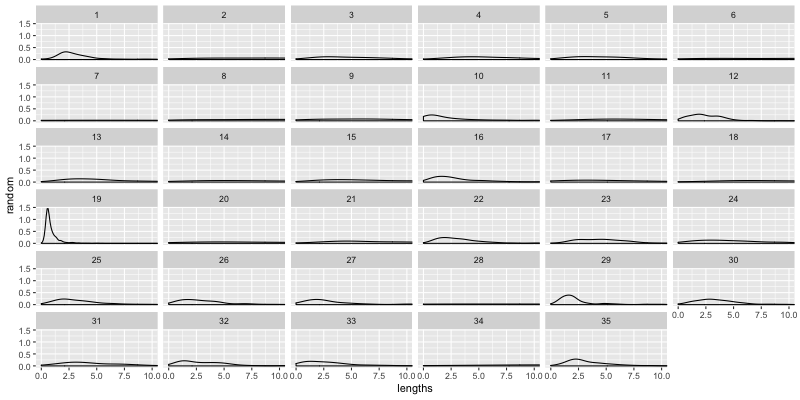

RObject{VecSxp}


In [30]:
R"""
ggplot($hlen,aes(x=lengths)) + facet_wrap(~sid) + geom_density() + ylab('random') + coord_cartesian(xlim=c(0,10))
"""

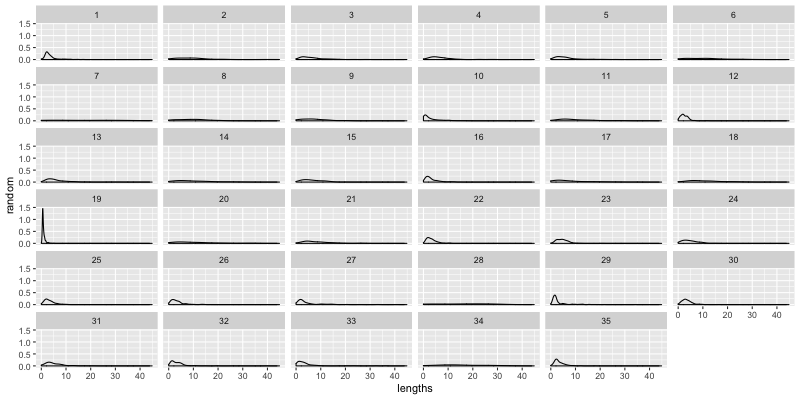

RObject{VecSxp}


In [31]:
R"""
ggplot($hlen,aes(x=lengths)) + facet_wrap(~sid) + geom_density() + ylab('random') 
"""

# Figure 4

In [130]:
datadir_all = joinpath("..","data","count_lengths","run_2018-11-28")
datadir_selected = joinpath("..","data","count_lengths","run_2018-11-30")

"../data/count_lengths/run_2018-11-30"

In [131]:
params_all = load_params(joinpath(datadir_all,"params.jld2"))
params_all[:pindex] = 1:size(params_all,1)
settings = joinpath(srcdir,"settings.toml")

results = []
for_results_in(joinpath(datadir_all,"data")) do entry
  push!(results,DataFrame(length=entry["lengths"],
                          percepts=entry["percepts"].+1, # after +1, indicates the number of streams reported, 1 or 2
                          created=entry["created"],
                          pindex=entry["pindex"])) # the parameter index (pindex = N correspondes to row N of `params`)
end
df_all = vcat(results...);

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[131]:2
└ @ Core In[131]:2
Progress: 100%|█████████████████████████████████████████| Time: 0:00:26


In [132]:
fields = [:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ]
progress = Progress(nrow(unique(params_all[fields])))
herr = human_error()
df_summary_all = by(params_all,fields) do row
    next!(progress)
    err = model_error(df_all,params_all;bound=false,(k => row[1,k] for k in fields)...)
    DataFrame(stream_error = err.stream,length_error = err.lengths,eratio = error_ratio(err,herr),pindex = row.pindex[1])
end

┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = top-level scope at In[132]:2
└ @ Core In[132]:2
Progress: 100%|█████████████████████████████████████████| Time: 0:02:16


,f_c_a,f_c_m,f_c_σ,s_c_a,s_c_m,s_c_σ,t_c_a,t_c_m,t_c_σ
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2
2,0.0,5.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2
3,0.0,63.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2
4,0.0,790.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2
5,0.0,10000.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2
6,0.0,0.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2
7,0.0,5.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2
8,0.0,63.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2
9,0.0,790.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2


In [133]:
params_selected = load_params(joinpath(datadir_selected,"params.jld2"))
params_selected[:pindex] = 1:size(params_selected,1)
settings = joinpath(srcdir,"settings.toml")

results = []
for_results_in(joinpath(datadir_selected,"data")) do entry
  push!(results,DataFrame(length=entry["lengths"],
                          percepts=entry["percepts"].+1, # after +1, indicates the number of streams reported, 1 or 2
                          created=entry["created"],
                          pindex=entry["pindex"])) # the parameter index (pindex = N correspondes to row N of `params`)
end
df_selected = vcat(results...);

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[133]:2
└ @ Core In[133]:2
Progress: 100%|█████████████████████████████████████████| Time: 0:00:09


In [134]:
fields = [:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ]
progress = Progress(nrow(unique(params_selected[fields])))
df_summary_selected = by(params_selected,fields) do row
    next!(progress)
    err = model_error(df_selected,params_selected;bound=false,(k => row[1,k] for k in fields)...)
    DataFrame(stream_error = err.stream,length_error = err.lengths, eratio = error_ratio(err,herr),pindex = row.pindex[1])
end

┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = top-level scope at In[134]:2
└ @ Core In[134]:2
Progress:  87%|███████████████████████████████████▉     |  ETA: 0:00:01┌ Warning: Expected 3 parameter entries. 
│ Instead, only found entires: 2×36 DataFrame
│ │ Row │ f_W_m_σ │ f_c_m   │ t_c_a   │ t_c_m   │ f         │ t_W_m_c │ t_c_x   │ f_c_x   │ t_W_m_σ_t │ s_τ_σ     │ f_c_a   │ f_c_σ   │ s_c_m   │ f_τ_a     │ s_c_σ   │ Δt        │ s_τ_m     │ s_c_x   │ t_W_m_σ_ϕ │ t_τ_a     │ s_c_a   │ t_τ_m     │ t_c_σ   │ t_τ_x     │ s_W_m_c │ s_τ_a     │ f_W_m_c │ t_τ_σ     │ f_τ_σ     │ f_τ_x     │ Δf    │ t_W_m_σ_N │ f_τ_m     │ s_τ_x     │ s_W_m_σ │ pindex │
│ │     │ Float64 │ Float64 │ Float64 │ Float64 │ Quantity… │ Float64 │ Float64 │ Float64 │ Float64   │ Quantity… │ Float64 │ Float64 │ Float64 │ Quantity… │ Float64 │ Quantity… │ Quantity… │ Float64 │ Float64   │ Quantity… │ Float64 │ Quantity… │ Flo

,f_c_a,f_c_m,f_c_σ,s_c_a,s_c_m,s_c_σ,t_c_a,t_c_m,t_c_σ
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,5.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2
2,5.0,5.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2
3,5.0,63.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2
4,5.0,0.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2
5,5.0,5.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2
6,5.0,63.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2
7,5.0,0.0,0.2,0.0,0.0,0.2,63.0,0.0,0.2
8,5.0,5.0,0.2,0.0,0.0,0.2,63.0,0.0,0.2
9,5.0,63.0,0.2,0.0,0.0,0.2,63.0,0.0,0.2


In [135]:
# if there is a selected entry with a revised eratio, use that value

df_summary_selected[:procedure] = "selected"
df_summary_all[:procedure] = "survey"
function favor_selected(vals,procedure)
    selected = findfirst(procedure .== "selected")
    if selected isa Nothing
        @assert length(vals) == 1
        first(vals)
    else
        vals[selected]
    end
end
    
df_summary_multi = @linq vcat(df_summary_all,df_summary_selected) |>
    by(fields,eratio = favor_selected(:eratio,:procedure),
              stream_error = favor_selected(:stream_error,:procedure),
              length_error = favor_selected(:length_error,:procedure))
head(df_summary_multi)

┌ Warning: Implicit broadcasting to a new column in DataFrame assignment is deprecated.Use an explicit broadcast with `df[!, col_ind] .= v`
│   caller = top-level scope at In[135]:1
└ @ Core In[135]:1
┌ Warning: Implicit broadcasting to a new column in DataFrame assignment is deprecated.Use an explicit broadcast with `df[!, col_ind] .= v`
│   caller = top-level scope at In[135]:4
└ @ Core In[135]:4
┌ Warning: `head(df::AbstractDataFrame)` is deprecated, use `first(df, 6)` instead.
│   caller = top-level scope at In[135]:19
└ @ Core In[135]:19


,f_c_a,f_c_m,f_c_σ,s_c_a,s_c_m,s_c_σ,t_c_a,t_c_m,t_c_σ
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2
2,0.0,5.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2
3,0.0,63.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2
4,0.0,790.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2
5,0.0,10000.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2
6,0.0,0.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2


In [136]:
mlevels = [(vars = [:f_c_a,:f_c_m], name = "Peripheral"),
          (vars = [:s_c_a,:s_c_m], name = "Cortical"),
          (vars = [:t_c_a,:t_c_m], name = "Object")]
dflevels = map(mlevels) do level
    result = by(df_summary_multi,level.vars) do slice
       DataFrame(c_a = first(slice[level.vars[1]]),c_m = first(slice[level.vars[2]]),
                 level = level.name, 
                 eratio = minimum(skipmissing(slice.eratio)),
                 stream_error = slice.stream_error[argmin(coalesce.(slice.eratio,-Inf))],
                 length_error = slice.length_error[argmin(coalesce.(slice.eratio,-Inf))])
            
    end
    result[[:c_a,:c_m,:level,:eratio,:stream_error,:length_error]]
end

dfplot = @linq vcat(dflevels...) |>
    transform(a = packaxes(:c_a,maxpad=false), m = packaxes(:c_m,maxpad=false)) |>
    transform(eratio_str = fmt.("01.2f",round.(:eratio,digits=2)))
head(dfplot)

┌ Warning: `getindex(sdf::SubDataFrame, colind::ColumnIndex)` is deprecated, use `sdf[!, colind]` instead.
│   caller = (::getfield(Main, Symbol("##381#383")){NamedTuple{(:vars, :name),Tuple{Array{Symbol,1},String}}})(::SubDataFrame{DataFrame,DataFrames.Index,Array{Int64,1}}) at In[136]:6
└ @ Main ./In[136]:6
┌ Warning: `getindex(sdf::SubDataFrame, colind::ColumnIndex)` is deprecated, use `sdf[!, colind]` instead.
│   caller = (::getfield(Main, Symbol("##381#383")){NamedTuple{(:vars, :name),Tuple{Array{Symbol,1},String}}})(::SubDataFrame{DataFrame,DataFrames.Index,Array{Int64,1}}) at In[136]:6
└ @ Main ./In[136]:6
┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = (::getfield(Main, Symbol("##380#382")))(::NamedTuple{(:vars, :name),Tuple{Array{Symbol,1},String}}) at In[136]:13
└ @ Main ./In[136]:13
┌ Warning: `head(df::AbstractDataFrame)` is deprecated, use `first(df, 6)` instead.
│   caller = top-

,c_a,c_m,level,eratio,stream_error,length_error,a,m
,Float64,Float64,String,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,Peripheral,0.899207,0.219417,0.0767705,0.0,0.0
2,0.0,5.0,Peripheral,0.523811,0.0984637,0.113126,0.0,1.5
3,0.0,63.0,Peripheral,0.698296,0.156353,0.0923359,0.0,2.5
4,0.0,790.0,Peripheral,0.725208,0.130445,0.170317,0.0,3.5
5,0.0,10000.0,Peripheral,0.706323,0.127495,0.16484,0.0,4.5
6,5.0,0.0,Peripheral,0.482961,0.0821006,0.124543,1.5,0.0


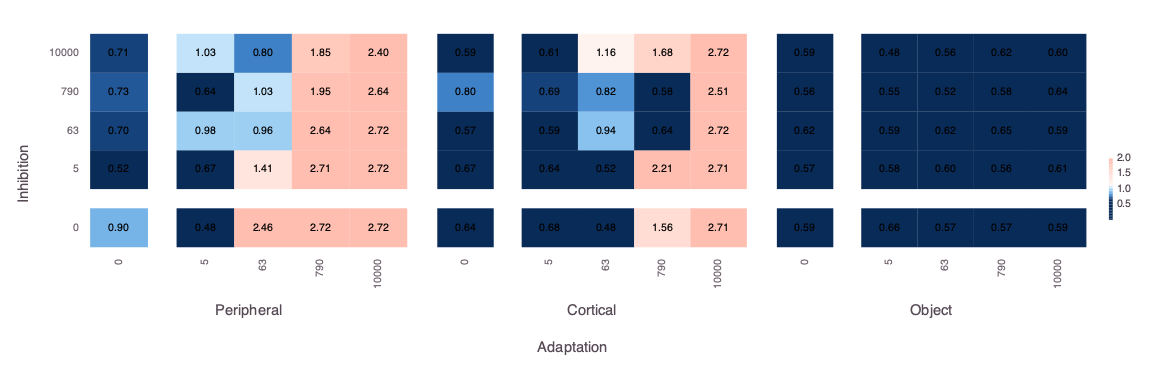

false

In [137]:
xvals = sort!(unique(dfplot.a));
yvals = sort!(unique(dfplot.m));

pl = plot(dfplot,x=:a,y=:m,color=:eratio,xgroup=:level,label=:eratio_str,
     Geom.subplot_grid(Geom.label(position=:centered),Geom.rectbin,Coord.cartesian(ymin=0,xmin=0),
                       Scale.x_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot.c_a,maxpad=false)),
                       Scale.y_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot.c_m,maxpad=false)),
                       Guide.xticks(ticks=xvals,orientation=:vertical),
                       Guide.yticks(ticks=yvals,orientation=:horizontal)),
     Guide.xlabel("Adaptation"), Guide.ylabel("Inhibition"),
     Guide.colorkey(title=""),
     Scale.color_continuous(minvalue=0,maxvalue=2,colormap=colorscale("RdBu",reverse=true,minvalue=0.0,
            maxvalue=2,colorstop=4,colorstart=0.65,midvalue=1.15)),
     Theme(grid_line_width=0inch,point_label_font_size=8pt,point_label_color=colorant"black"))
draw(PDF(joinpath(plotdir,"fig4A.pdf"),7.75inch,3.5inch),pl)
draw(PNG(12inch,4inch),pl)

# Figure 4B-C

In [138]:
hstr,hlen = human_error_by_sid();
dfstr_mul = vcat(DataFrame(kind=dfplot.level,error=dfplot.stream_error),DataFrame(kind="human",error=hstr.x1));
dflen_mul = vcat(DataFrame(kind=dfplot.level,error=dfplot.length_error),DataFrame(kind="human",error=hlen.x1));

In [139]:
dfstr_mul = @linq dfstr_mul |> where(.!ismissing.(:error));

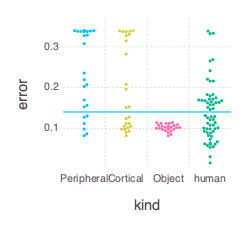

In [140]:
strplot = plot(dfstr_mul,y=:error,x=:kind,color=:kind,intercept=[mean(skipmissing(hstr.x1))],slope=[0],Geom.abline,Geom.beeswarm(padding=0.05mm),
    Coord.cartesian(ymax=0.35),Theme(key_position=:none,point_size=0.4mm),Guide.xticks(orientation=:horizontal))
draw(PNG(2.6inch,2.5inch),strplot)
draw(PDF(joinpath(plotdir,"fig4B.pdf"),3.2inch,2inch),strplot)

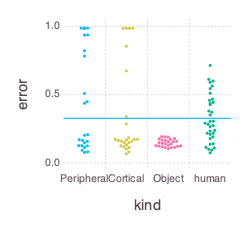

In [141]:
strplot = plot(dflen_mul,y=:error,x=:kind,color=:kind,intercept=[mean(hlen.x1)],slope=[0],Geom.abline,
    Geom.beeswarm(padding=0.05mm),Theme(key_position=:none,point_size=0.4mm),Guide.xticks(orientation=:horizontal))
draw(PNG(2.6inch,2.5inch),strplot)
draw(PDF(joinpath(plotdir,"fig4C.pdf"),3.2inch,2inch),strplot)

In [142]:
stats = by(vcat(dflevels...),:level) do x
    DataFrame(mean = mean(skipmissing(x.eratio)),min = minimum(skipmissing(x.eratio)))
end

,level,mean,min
,String,Float64,Float64
1,Peripheral,1.56374,0.482961
2,Cortical,1.21809,0.482961
3,Object,0.587123,0.482961
